# Loading the Data

In [1]:
# Load pickled data
import pickle
import numpy as np

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


Instructions for updating:
non-resource variables are not supported in the long term



# Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

'features' is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).

'labels' is a 1D array containing the label/class id of the traffic sign. The file signnames.csv contains id -> name mappings for each id.

'sizes' is a list containing tuples, (width, height) representing the original width and height the image.

'coords' is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the pandas shape method might be useful for calculating some of the summary results.

# Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas


In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_validation.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of a traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


# Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The Matplotlib examples and gallery pages are a great resource for doing visualizations in Python.

NOTE: It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.  It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

23


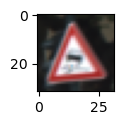

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

# Step 2: Design and Test a Model Architecture
Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the German Traffic Sign Dataset.

The LeNet-5 implementation shown in the classroom at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission.

There are various aspects to consider when thinking about this problem:

Neural network architecture (is the network over or underfitting?)
Play around preprocessing techniques (normalization, rgb to grayscale, etc)
Number of examples per label (some have more than others).
Generate fake data.
Here is an example of a published baseline model on this problem. It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

# Pre-process the Data Set (normalization, grayscale, etc.)
Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, (pixel - 128)/ 128 is a quick way to approximately normalize the data and can be used in this project.

Other pre-processing steps are optional. You can try different techniques to see if it improves performance.

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [53]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

#X_train = (X_train-128)/128
#X_validation = (X_validation-128)/128
#X_test = (X_test-128)/128

X_train = X_train/225
X_validation = X_validation/225
X_test = X_test/225




# Model Architecture

In [54]:
### Using LeNet architecture.

def LeNet(x): 
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    w = {'wc1': tf.Variable(tf.truncated_normal(shape=[5,5,3,6], mean = mu, stddev = sigma)), 
        'wc2': tf.Variable(tf.truncated_normal(shape=[5,5,6,16], mean = mu, stddev = sigma)),
        'wd1': tf.Variable(tf.truncated_normal(shape=[5*5*16,120], mean = mu, stddev = sigma)),
        'wd2': tf.Variable(tf.truncated_normal(shape=[120,84], mean = mu, stddev = sigma)),
        'out': tf.Variable(tf.truncated_normal(shape=[84,43], mean = mu, stddev = sigma)) }
    
    b ={'bc1': tf.Variable(tf.zeros([6])),
       'bc2': tf.Variable(tf.zeros([16])),
       'bd1': tf.Variable(tf.zeros([120])),
       'bd2': tf.Variable(tf.zeros([84])),
       'out': tf.Variable(tf.zeros([43]))
       }
        
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1 = tf.nn.conv2d(x, w['wc1'], strides = [1,1,1,1], padding = 'VALID')
    conv1 = tf.nn.bias_add(conv1,b['bc1'])
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = tf.nn.conv2d(conv1, w['wc2'], strides = [1,1,1,1], padding = 'VALID')
    conv2 = tf.nn.bias_add(conv2,b['bc2'])
    # Activation.
    conv2 = tf.nn.relu(conv2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    
    # Flatten. Input = 5x5x16. Output = 400.
    conv2_flat = tf.reshape(conv2, [-1, w['wd1'].get_shape().as_list()[0]]) 
    
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(conv2_flat,w['wd1']), b['bd1'])
    # Activation.
    fc1 = tf.nn.relu(fc1)

    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1,w['wd2']), b['bd2'])
    # Activation.
    fc2 = tf.nn.relu(fc2)

    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(fc2,w['out']), b['out'])
    
    return logits

# Features and Labels

x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

You do not need to modify this section.

In [55]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [56]:
# Hyperparameters
EPOCHS = 10
BATCH_SIZE = 128
rate = 0.001


In [57]:

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [58]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [59]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.763

EPOCH 2 ...
Validation Accuracy = 0.851

EPOCH 3 ...
Validation Accuracy = 0.860

EPOCH 4 ...
Validation Accuracy = 0.880

EPOCH 5 ...
Validation Accuracy = 0.883

EPOCH 6 ...
Validation Accuracy = 0.895

EPOCH 7 ...
Validation Accuracy = 0.898

EPOCH 8 ...
Validation Accuracy = 0.909

EPOCH 9 ...
Validation Accuracy = 0.907

EPOCH 10 ...
Validation Accuracy = 0.911

Model saved


In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))